# Regressão Linear

Conceitos e Implementação:

## Equação Linear



```
O objetivo da tarefa de regressão é estimar um valor a partir do
relacionamento de duas ou mais variáveis. Essa relação é representada
por uma equação matemática, onde a previsão é realizada calculando a 
soma ponderada das características de entrada, mais uma constante
chamada coeficiente linear.
```



Equação Linear:

y = θ₀+θ₁x₁+θ₂x₂+...+θₙxₙ

```
Onde:
ŷ é o valor previsto;
n é o número de características;
xᵢ é o valor da i-ésima característica;
θ₀ é o coeficiente linear, valor onde a reta corta o eixo das ordenadas (y);
θᵢ é o peso da i-ésima característica.
```

Equação Linear Vetorizada:

y = hθ(x) = θT.x

```
Onde:
θ é o vetor de parâmetro do modelo (θ₀, θ₁, … , θₙ);
θᵀ é a transposição de θ;
x é o vetor de características (x₀, x₁, … , xₙ);
hθ é a função de hipótese.
```



## Método dos Minimos Quadráticos:

```
Ao treinar um modelo de regressão linear, estamos interessados em obter
o valor de 𝜃 que minimize a função de custo. Uma função de custo 
tipicamente utilizada em problemas de regressão é o MSE (Erro Quadrático Médio):
```

### Erro Quadrático Médio (MSE) - Contextualização Matemática:

*MSE*(X,hθ)=(m/1​)*∑(θT.x(i)−yi)2



```
Onde:
m é o número de instâncias no conjunto de dados.
θᵀ é a transposição do vetor de parâmetro do modelo.
x⁽ⁱ⁾ é o vetor contendo os valores das características e yⁱ seus respectivos rótulos.
X é uma matriz das características.
hθ é a função de hipótese.
```




Para que serve o Erro Quadrático médio?
```
O Erro Quadrático Médio nos informa a que distância a reta de regressão
está do conjunto de dados. Calculando o erro (distância entre os pontos
e a reta) e elevando ao quadrado (para remover sinais negativos), dando
maior peso para grandes erros. A reta com o melhor ajuste possível é a
que fornece o menor erro quadrático médio.
```



Encontrando o valor de **θ**

```
Para encontrar o valor de 𝜃 que minimize a função MSE,
existe o Método dos Mínimos Quadrados:
```
θ=(XT.X)−1.XT.y

```
θ̂ é o valor de θ que minimiza a função custo.
y é o vetor dos valores do alvo.
```





In [ ]:
# Importações:
import numpy as np #Para trabalhar com Arryas e Matrizes.
import matplotlib.pyplot as plt #Para plotagem dos gráficos, entendimento visual.

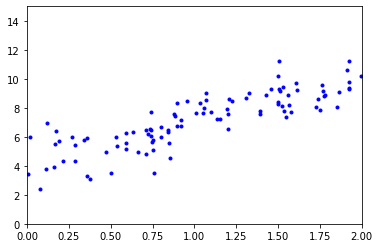

In [ ]:
# Gerando um conjunto de dados lineares e calculando θ̂ usando o Método dos Mínimos Quadrados.
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plotagem Gráfica
plt.plot(X, y, "b.") #Detalhe - . do b. é só pra montar como pontos.
plt.axis([0, 2, 0, 15]) # O gráfico vai de 0 a 2 horizontalmente, 0,15 verticalmente.
plt.show()



```
Nosso objetivo é encontrar a reta que melhor se ajusta ao nosso
conjunto de treinamento. Esta reta é definida pela equação:
```
y=θ0+θ1x+ε

```
θ₀ é o coeficiente linear.
θ₁ é o coeficiente angular.
ε é o ruído gaussiano.
```




In [ ]:
# Obtendo θ₀ e θ₁ através do Método dos Mínimos Quadrados:
X_b = np.c_[np.ones((100, 1)), X]
theta_param = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#Caso se queria ver as saidas:
#print(X_b, type(X_b))
#print(theta_param, type(theta_param))



```
A equação utilizada para gerar os dados foi 𝑦 = 4+3𝑥, a diferença
entre o valor utilizado e o obtido é causado pelo ruído gaussiano.
Agora que temos θ, podemos fazer previsões:
```



In [ ]:
# Previsão Utilizando o Numpy:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_param)
display(y_predict)

array([[ 4.11883831],
       [10.04256776]])

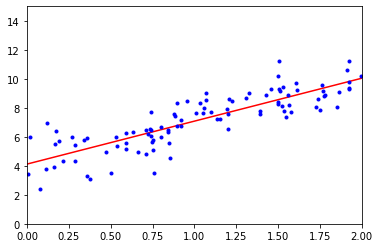

In [ ]:
# Plotagem Gráfica
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()



```
Note que essa previsão foi feita apenas utilizando a biblioteca Numpy,
a matplotlib.pyplot é só para a visualização, não interfere do código,
ou seja, aqui é puro entendimento matemático das formulas e a biblioteca
numpy para se trabalhar com os objetos array de uma forma mais confortavel.
```





```
Porém, na prática, esse tipo de previsão é feita utilizando a biblioteca
Scikit-Learn e olha como o código fica mais curto com ela.
```



In [ ]:
#Importações:
from sklearn.linear_model import LinearRegression #Padrão: Da "caixa" de ferramentas, importa-se a ferramenta que se quer.



```
Esse método de importação é padrão, a biblioteca Scikit-Learn tem vários
modelos de algorítmos... Sendo assim, você sempre importa o modelo que
se queira utilizar.

Para a utilização adequada da biblioteca, tem que se ter isso em mente,
que sempre e estara importanto algum dos modelos da biblioteca. Ou seja,
é uma biblioteca que ajuda MUITO, mas também é uma caixa preta.
```



In [ ]:
# O mesmo código feito acima, utiilzando Numpy:
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg.intercept_ #coeficiente linear
linear_reg.coef_ #coeficiente angular
linear_reg.predict(X_new)

array([[ 4.11883831],
       [10.04256776]])

Note que:
```
Mas note que ele utilizou a variável X_new criada com o numpy, ou seja,
ainda assim, ainda que a biblioteca scikit-Learn ajude, na prática,
ainda vai se precisar de complementos.
```



```
E além disso as próprias saidas de algumas funções da biblioteca Scikit-Learn
são do typo array numpy... Ou seja, na prática, de fato a biblioteca 
scikit-Learn precisa de complementação.
```





In [ ]:
# Tipologia das Variáveis:
print(linear_reg.fit(X, y), type(linear_reg.fit(X, y)))
print(linear_reg.intercept_,type(linear_reg.intercept_))
print(linear_reg.coef_,type(linear_reg.coef_))
print(linear_reg.predict(X_new),type(linear_reg.predict(X_new)))

LinearRegression() <class 'sklearn.linear_model._base.LinearRegression'>
[4.11883831] <class 'numpy.ndarray'>
[[2.96186472]] <class 'numpy.ndarray'>
[[ 4.11883831]
 [10.04256776]] <class 'numpy.ndarray'>


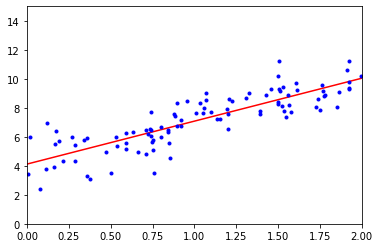

In [ ]:
# Plotagem Gráfica
plt.plot(X_new, linear_reg.predict(X_new), "r-") # Mais uma vez a X_new aparece.
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Método do Gradiente Descendente em Lote



```
O Gradiente Descendente é um algoritmo de otimização que realiza o
ajuste de parâmetros de forma iterativa com o objetivo de encontrar o
valor θ₀ e θ₁ que minimiza a função de interesse. Ou seja, a reta que
melhor se ajusta aos dados.
```



```
O método inicia preenchendo θ₀ e θ₁ com valores aleatórios, e melhora
gradualmente a cada iteração, dando um pequeno passo de cada vez até
que o algoritmo convirja para um mínimo. O tamanho dos passos é
definido pelo hiperparâmetro taxa de aprendizado.
```



```
Se a taxa de aprendizado for muito pequena, o algoritmo levará muito
tempo para convergir devido ao grande número de iterações.

Se a taxa de aprendizado for muito alta, o algoritmo poderá ultrapassar
o mínimo, não encontrando uma boa solução.
```








Gradiente Descendente em Lote
```
Para implementar o Gradiente Descendente, precisamos calcular quanto
mudará a função custo se alterarmos apenas um pouco do θⱼ. Isto é
chamado derivada parcial. A derivada nos dá a taxa de variação de uma
função em um determinado ponto, quando temos uma taxa de variação igual
a zero, significa que atingimos um ponto plano da função, esse ponto
pode ser um mínimo local ou mínimo global. Mínimos locais são um dos
principais desafios do Gradiente Descendente, pois a solução não é tão
boa quanto o mínimo global.
```



Função MSE (Erro Quadrático Médio)
```
Felizmente, a função de custo MSE (Erro Quadrático Médio) é convexa. Ou
seja, se escolhermos quaisquer dois pontos na curva, a linha que os une
nunca irá cruzar a curva. Dessa forma, não há a ocorrência de mínimos
locais, apenas um mínimo global. Porém, se tivermos características com
escalas muito diferentes, eventualmente alcançaremos o mínimo, mas
iremos demorar muito. Portanto, ao utilizar o Gradiente Descendente,
devemos garantir que todas as características tenham escalas similares.
```



Calculo da Função:

```
A derivada parcial da função de custo em relação ao parâmetro θⱼ é 
calculada da seguinte forma:
```

(∂/∂θj)MSE(θ)= m2∑(θT.x(i)−y(i))xj(i)



```
m é o número de instâncias no conjunto de dados.
θᵀ é a transposição do vetor de parâmetro do modelo.
x⁽ⁱ⁾ é o vetor contendo os valores das características e yⁱ seus respectivos rótulos.
```



```
Em vez de calcular cada derivada parcial individualmente, podemos
calculá-las todas de uma vez através do vetor gradiente:
```
▽θMSE(θ)=(2/m)XT(X.θ−y)


```
n é o número de características;
Xᵀ é transposição da matriz de características.
y é o vetor dos valores do alvo.
```



```
No GD em Lote, todo o conjunto de treinamento (X) é utilizado no
cálculo do vetor gradiente. Ou seja, ele utiliza todo o lote de dados
em cada etapa.

O vetor gradiente aponta para o crescimento da função, como desejamos
descer, basta caminharmos para o lado oposto (subtraindo o vetor de θ).
A taxa de aprendizado é definida por η (Eta), multiplicamos o vetor
gradiente por η para definir o tamanho do passo.
```
θ(nextstep)=θ−η▽θMSE(θ)






​




In [ ]:
# Gerando um Conjunto de dados Lineares:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Utilizando o algorítmo de Gradiente Descendente em Lote:
n = 0.1 #taxa de aprendizado
iterations = 1000
m = 100 #nº de instâncias 

X_b = np.c_[np.ones((100, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
theta = np.random.randn(2, 1) #inicialização aleatória

for i in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - n * gradients

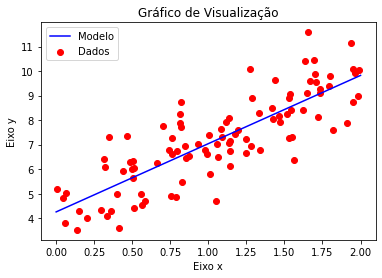

In [ ]:
#Plotagem do Gráfico:
plt.scatter(X, y, marker='o', color='red')
plt.plot(X_new, X_new_b.dot(theta), 'b-')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Gráfico de Visualização')
plt.legend(["Modelo","Dados"], loc='best')
plt.show()



```
O principal problema do GD em Lote é o fato dele utilizar todo o
conjunto de treinamento em cada passo, tornando o processo muito lento
para um grande conjunto de dados.
```



## Método do Gradiente Descendente Estocástico

```
O GD Estocástico escolhe aleatoriamente uma instância do conjunto de
treinamento e realiza o cálculo do gradiente baseado apenas nesta
instância. Isso torna o algoritmo mais rápido devido a pequena
quantidade de dados para manipular a cada iteração. Além disso, permite
realizar o treinamento em grandes conjuntos de dados que não cabem na
memória principal (out-of-core learning), visto que apenas uma
instância precisa estar na memória a cada iteração. No out-of-core
learning, o algoritmo carrega parte dos dados, realiza o treinamento
nesses dados e repete o processo até que o treinamento tenha sido
realizado em todo o conjunto.
```
```
OBS:
Devido a sua aleatoriedade, esse algoritmo é menos regular do que o GD
em Lote, em vez de diminuir suavemente até o mínimo, a função custo irá
oscilar e diminuir na média. Dessa forma, os valores obtidos serão
bons, mas não ótimos.
```
```
A aleatoriedade é boa para escapar do ótimo local, porém o algoritmo
pode nunca se estabelecer no mínimo. Felizmente existe uma solução para
este dilema, que consiste em reduzir gradualmente a taxa de
aprendizado, as etapas começam com uma taxa alta para fugir dos mínimos
locais e diminuem para atingir o mínimo global. Porém, se a taxa for
reduzida rapidamente, o algoritmo poderá ficar preso em um mínimo
local. Se reduzida lentamente, poderá saltar em torno do mínimo e obter
uma solução insuficiente. A função responsável por determinar a taxa de
aprendizado em cada iteração é chamada de cronograma de aprendizado
(learning schedule).
```





In [ ]:
# Implementando o algoritmo do GD Estocástico:
n_iter = 50
t0, t1 = 5, 50 #hiperparâmetros de aprendizado

def learning_schedule(t): #cronograma de aprendizado
    return t0/(t+t1)

theta = np.random.randn(2,1) #inicialização aleatória

for ite in range(n_iter):
    for i in range(m):
        random_index = np.random.randint(m) #obtém instância aleatória
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(ite * m + i)
        theta = theta - eta * gradients

```
Achado os θ do algoritmo GD Estocástico encontrou, uma boa solução
realizando apenas 50 iterações, enquanto o GD em Lote passou 1000 vezes
pelo conjunto de treinamento.
```

In [ ]:
# Otimizando a Regressão Linear com o GD Estocástico usando a biblioteca Scikit-Learn:
from sklearn.linear_model import SGDRegressor



```
Note que o processo se repete, é a mesma parada, importa-se o modelo
que se queira usar da caixa de ferramente. Sem mistério.
```



In [ ]:
# código:
sgd = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #No arquivo original há um erro nesse trecho, o argumento correto é "max_iter".
sgd.fit(X, y.ravel())
sgd.intercept_ #theta0 
sgd.coef_ #theta1

array([2.76348149])

## Gradiente Descendente em Minilotes



```
Diferentemente do GD em Lotes que utiliza todo o conjunto de
treinamento em cada etapa ou do GD Estocástico que calcula os
gradientes com base em apenas uma única instância por iteração,
o GD em Minilotes utiliza pequenos conjuntos aleatórios de dados
chamados minilotes para obter os gradientes. Como resultado, o GD em
Minilotes é mais regular do que o GD Estocástico, ficando mais próximo do mínimo.
```



In [ ]:
# Implementando o GD em Minilotes:
n_iter = 50
minibatch_size = 20 #tamanho dos minilotes

np.random.seed(42)
theta = np.random.randn(2, 1) #inicialização aleatória

t0, t1 = 200, 1000
def learning_schedule(t): #cronograma de aprendizado
    return t0/(t+t1)

t = 0
for ite in range(n_iter):
    shuffled_ind = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_ind]
    y_shuffled = y[shuffled_ind]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients